In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cars=pd.read_csv('quikr_car.csv')

In [3]:
cars

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


In [4]:
cars.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [5]:
cars['fuel_type'].unique()
cars=cars[~cars['fuel_type'].isna()]

In [6]:
cars=cars[cars['Price']!='Ask For Price']

In [7]:
backup=cars.copy()

In [8]:

cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    object
 3   Price       816 non-null    object
 4   kms_driven  816 non-null    object
 5   fuel_type   816 non-null    object
dtypes: object(6)
memory usage: 44.6+ KB


In [9]:
cars['name']=cars['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

In [10]:
cars['Price']=cars['Price'].str.replace(',','').astype(int)

In [11]:
cars['year']=cars['year'].astype(int)

In [12]:
cars['Price']=cars['Price'].astype(int)

In [13]:
cars['kms_driven']=cars['kms_driven'].str.split().str.slice(start=0,stop=1).str.join(' ')

In [14]:
cars['kms_driven']=cars['kms_driven'].str.split().str.get(0).str.replace(',','').astype(int)

In [15]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int64 
 3   Price       816 non-null    int64 
 4   kms_driven  816 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 44.6+ KB


In [16]:
cars

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [17]:
cars=cars.reset_index(drop=True)

In [18]:
carscleaned=cars.rename(columns={'name':'N','company':'CN','year':'Y','kms_driven':'KMD','fuel_type':'FT','Price':'P'})

In [19]:
carscleaned

,N,CN,Y,P,KMD,FT
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [20]:
carscleaned.describe()

,Y,P,KMD
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


In [21]:
carscleaned=carscleaned[carscleaned['P']<6000000].reset_index(drop=True) #one outlier

lets perform EDA

In [22]:
carscleaned

,N,CN,Y,P,KMD,FT
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
810,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
811,Tata Indica V2,Tata,2009,110000,30000,Diesel
812,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
813,Tata Zest XM,Tata,2018,260000,27000,Diesel


<Axes: xlabel='FT'>

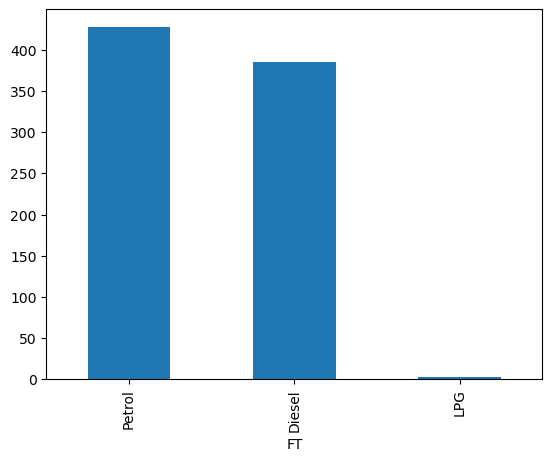

In [23]:
carscleaned['FT'].value_counts().plot(kind='bar')



<Axes: xlabel='CN'>

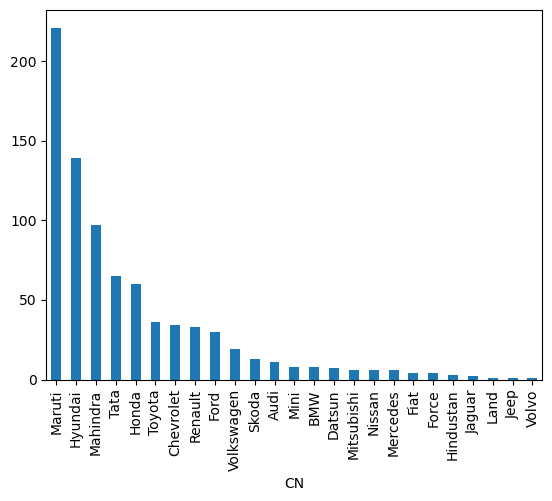

In [24]:
carscleaned['CN'].value_counts().plot(kind='bar')

/Users/jaypanchal/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


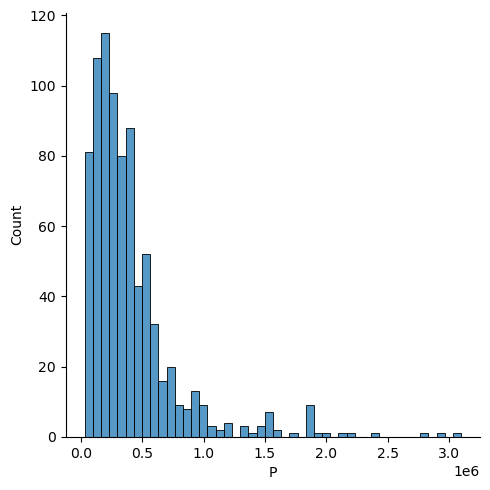

/Users/jaypanchal/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


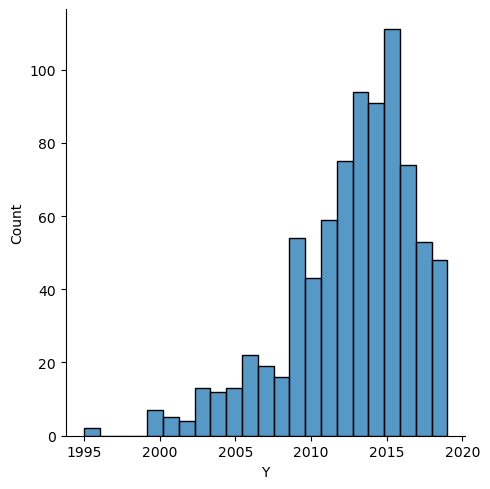

/Users/jaypanchal/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


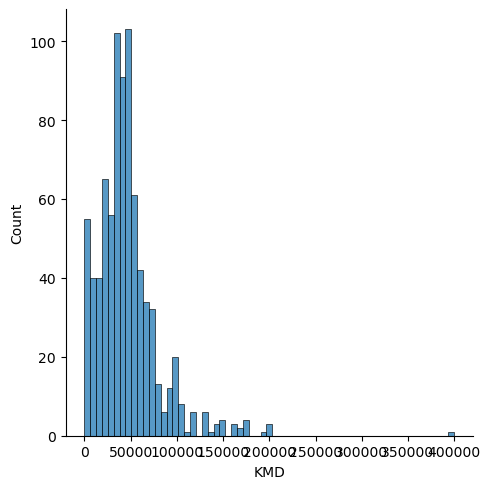

In [122]:
sns.displot(carscleaned['P'])
plt.show()
sns.displot(carscleaned['Y']) 
plt.show()
sns.displot(carscleaned['KMD']) 
plt.show()

/Users/jaypanchal/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


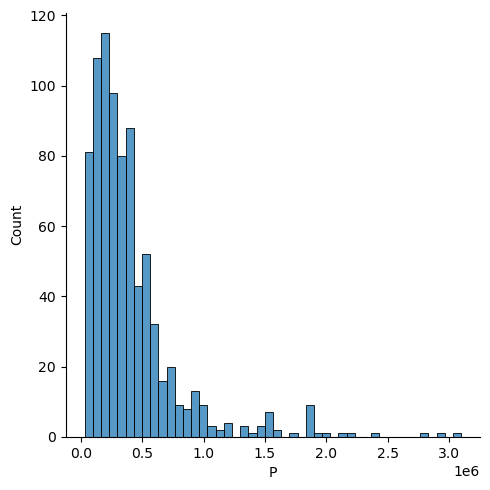

In [121]:
sns.displot(carscleaned['P'])

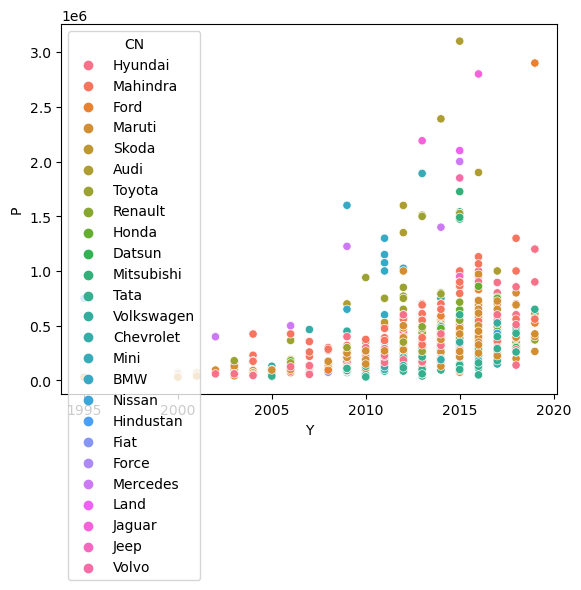

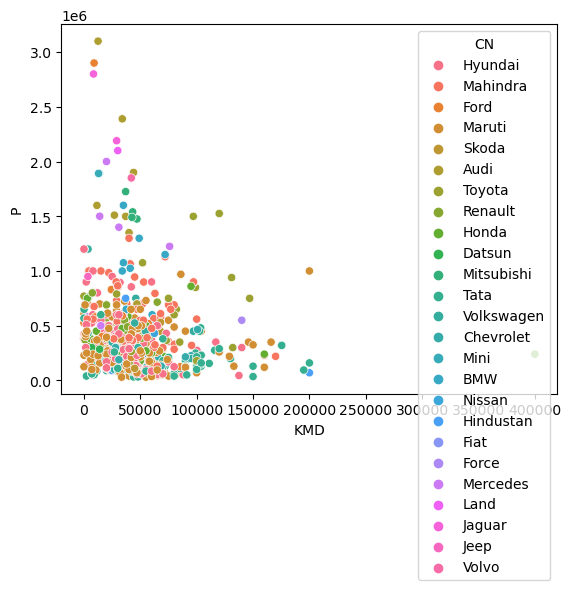

In [27]:
sns.scatterplot(data=carscleaned,x='Y',y='P',hue='CN')
plt.show()
sns.scatterplot(data=carscleaned,x='KMD',y='P',hue='CN')
plt.show()


<Axes: xlabel='FT', ylabel='P'>

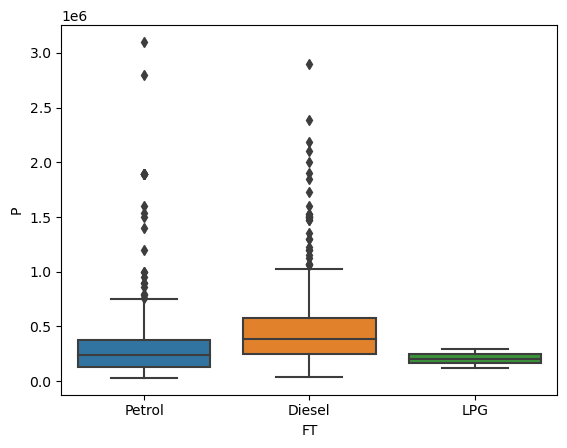

In [28]:
sns.boxplot(data=carscleaned, x='FT',y='P')

HENCE WE DID OUR SIMPLE EDA

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer

In [51]:
X=carscleaned[['N','CN','Y','KMD','FT']]
y=carscleaned['P']


In [82]:
X

,N,CN,Y,KMD,FT
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
810,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
811,Tata Indica V2,Tata,2009,30000,Diesel
812,Toyota Corolla Altis,Toyota,2009,132000,Petrol
813,Tata Zest XM,Tata,2018,27000,Diesel


In [83]:

y


0       80000
1      425000
2      325000
3      575000
4      175000
        ...  
810    270000
811    110000
812    300000
813    260000
814    390000
Name: P, Length: 815, dtype: int64

In [84]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_train


,N,CN,Y,KMD,FT
641,Tata Sumo Gold,Tata,2014,116000,Diesel
598,Chevrolet Beat LT,Chevrolet,2012,90001,Diesel
48,Mahindra Bolero DI,Mahindra,2017,23452,Diesel
90,BMW 3 Series,BMW,2011,60500,Petrol
681,Hyundai Santro AE,Hyundai,2011,45000,Petrol
...,...,...,...,...,...
300,Mahindra Scorpio 2.6,Mahindra,2007,170000,Diesel
677,Audi A3 Cabriolet,Audi,2015,12516,Petrol
303,Honda Mobilio,Honda,2014,44000,Petrol
722,Hyundai Santro Xing,Hyundai,2007,46000,Petrol


In [92]:

from sklearn.compose import make_column_transformer
ohe=OneHotEncoder()
ohe.fit(X[['N','CN','FT']])


OneHotEncoder()

In [93]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['N','CN','FT']),
                                    remainder='passthrough')

In [94]:
lr=LinearRegression()

In [96]:
from sklearn.pipeline import make_pipeline
pipe=make_pipeline(column_trans,lr)

In [97]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['N', 'CN', 'FT'])])),
                ('linearregression', LinearRegression())])

In [98]:
y_pred=pipe.predict(X_test)

In [99]:
from sklearn.metrics import r2_score

In [100]:
r2_score(y_test,y_pred)

0.6469591849064562

In [101]:
scores=[]
for i in range(5000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [102]:
np.argmax(scores)

4156

In [103]:
scores[np.argmax(scores)]

0.8995144211129433

In [104]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.8995144211129433

In [ ]:
pipe.predict(X_test)

In [135]:
data=pd.DataFrame({
   'N':"Honda City",
    'CN':'Honda',
    'Y':2000,
    'KMD':80000,
    'FT':'Petrol'
},index=[0])
pipe.predict(data)

array([37027.87945019])

In [106]:
X_test

,N,CN,Y,KMD,FT
513,Maruti Suzuki Wagon,Maruti,2009,27000,Petrol
645,Mitsubishi Pajero Sport,Mitsubishi,2015,42590,Diesel
138,Volkswagen Polo Comfortline,Volkswagen,2015,2800,Petrol
146,Renault Duster,Renault,2013,41000,Diesel
198,Maruti Suzuki Wagon,Maruti,2010,54870,Petrol
...,...,...,...,...,...
70,Mini Cooper S,Mini,2013,13000,Petrol
405,Mahindra TUV300 T8,Mahindra,2018,4500,Diesel
202,Mahindra Quanto C8,Mahindra,2013,20000,Diesel
199,Maruti Suzuki Alto,Maruti,2010,34580,Petrol


In [105]:
y_test

513     159000
645    1490000
138     399999
146     399999
198     145000
        ...   
70     1891111
405    1000000
202     375000
199     135000
383      65000
Name: P, Length: 82, dtype: int64

In [113]:
import pickle

In [128]:
pickle.dump(pipe,open('carmodel.pkl','wb'))

In [131]:
pickle.dump(X.to_dict(),open('carinfo.pkl','wb'))